## Build unigram dictionary

In [45]:
import nltk
from nltk.corpus import brown
from nltk import bigrams, ngrams, trigrams 

sentences=['a b a','b a a b','a a a','b a b b','b b a b','a a a b'] # data 

unigrams=[]

for elem in sentences:
    unigrams.extend(elem.split())
   
from collections import Counter
unigram_counts=Counter(unigrams)
unigram_total=len(unigrams)

for word in unigram_counts:
    unigram_counts[word]/=unigram_total
 
print(unigram_counts)

Counter({'a': 0.5454545454545454, 'b': 0.45454545454545453})


## Build bigram dictionary

In [46]:
def bigram_model(sentences):
    model={}
    for sent in sentences:
         for w1,w2 in ngrams(sent.split(),2, pad_left=True,pad_right=True):
            if w1 not in model:
                model[w1]={}
            if w2 not in model[w1]:
                model[w1][w2]=0
            model[w1][w2]+=1
    for w1 in model:
        tot_count=float(sum(model[w1].values()))
        for w2 in model[w1]:
            model[w1][w2]/=tot_count
     
    return model

bigram_counts= bigram_model(sentences)
print(bigram_counts)

{'a': {'a': 0.4166666666666667, None: 0.16666666666666666, 'b': 0.4166666666666667}, None: {'a': 0.5, 'b': 0.5}, 'b': {'a': 0.4, None: 0.4, 'b': 0.2}}


## Build trigram dictionary

In [47]:
def trigram_model(sentences):
    model={}
    for sent in sentences:
         for w1,w2,w3 in ngrams(sent.split(),3, pad_left=True,pad_right=True):
            if (w1,w2) not in model:
                model[(w1,w2)]={}
            if w3 not in model[(w1,w2)]:
                model[(w1,w2)][w3]=0
            model[(w1,w2)][w3]+=1
    for (w1,w2) in model:
        tot_count=float(sum(model[(w1,w2)].values()))
        for w3 in model[(w1,w2)]:
            model[(w1,w2)][w3]/=tot_count
     
    return model

trigram_counts= trigram_model(sentences)
print(trigram_counts)

{('a', 'b'): {'a': 0.2, None: 0.6, 'b': 0.2}, (None, 'b'): {'a': 0.6666666666666666, 'b': 0.3333333333333333}, ('a', 'a'): {'a': 0.4, None: 0.2, 'b': 0.4}, (None, None): {'a': 0.5, 'b': 0.5}, (None, 'a'): {'a': 0.6666666666666666, 'b': 0.3333333333333333}, ('b', 'a'): {'a': 0.25, None: 0.25, 'b': 0.5}, ('b', None): {None: 1.0}, ('b', 'b'): {'a': 0.5, None: 0.5}, ('a', None): {None: 1.0}}


## Test Scores of each model

In [48]:
test_sentences=['a b a b','b a b a','a b b','b a a a a a b','a a a','b b b b a']

import numpy as np

test_unigram_arr=[]

print('Unigram test probabilities\n')
for elem in test_sentences:
    p_val=np.prod([unigram_counts[i] for i in elem.split()])
    test_unigram_arr.append(p_val)
    print('The sequence '+elem+' has unigram probablity of '+ str(round(p_val,4)))


print('\nBigram test probabilities\n')

test_bigram_arr=[]

for elem in test_sentences:
    p_val=1
    for w1,w2 in bigrams(elem.split(),pad_left=True,pad_right=True):
        p_val*=bigram_counts[w1][w2]
    print('The sequence '+ elem +' has bigram probablity of '+ str(round(p_val,4)))
    
    test_bigram_arr.append(p_val)


test_trigram_arr=[]
print('\nTrigram test probabilities\n')
for elem in test_sentences:
    p_val=1
    for w1,w2,w3 in trigrams(elem.split(),pad_left=True,pad_right=True):
        try:
            p_val*=trigram_counts[(w1,w2)][w3]
        except Exception as e:
            p_val=0
            break
    print('The sequence '+ elem +' has trigram probablity of '+ str(round(p_val,4)))
    
    test_trigram_arr.append(p_val)
            

Unigram test probabilities

The sequence a b a b has unigram probablity of 0.0615
The sequence b a b a has unigram probablity of 0.0615
The sequence a b b has unigram probablity of 0.1127
The sequence b a a a a a b has unigram probablity of 0.01
The sequence a a a has unigram probablity of 0.1623
The sequence b b b b a has unigram probablity of 0.0233

Bigram test probabilities

The sequence a b a b has bigram probablity of 0.0139
The sequence b a b a has bigram probablity of 0.0056
The sequence a b b has bigram probablity of 0.0167
The sequence b a a a a a b has bigram probablity of 0.001
The sequence a a a has bigram probablity of 0.0145
The sequence b b b b a has bigram probablity of 0.0003

Trigram test probabilities

The sequence a b a b has trigram probablity of 0.01
The sequence b a b a has trigram probablity of 0.0083
The sequence a b b has trigram probablity of 0.0167
The sequence b a a a a a b has trigram probablity of 0.0013
The sequence a a a has trigram probablity of 0.026

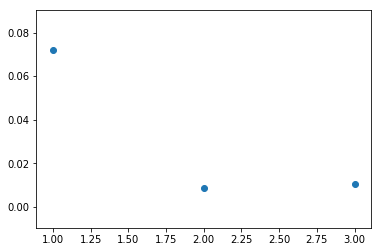

In [44]:
import matplotlib.pyplot as plt

x_axis=[i for i in range(1,4)]

y_axis=[np.mean(test_unigram_arr), np.mean(test_bigram_arr), np.mean(test_trigram_arr)]

plt.scatter(x_axis,y_axis)
plt.show()